# Experiment Design

For Exponential model, $P(Y = y|X) = |\beta^{\texttt T }X|\exp(-|\beta^{\texttt T} X|y)$. Thus the quantile function would be $q^{*}_{\alpha}(X) = \log(1-\alpha)/-|\beta^{\texttt T} X|$  

## Step 1: Peek into $\kappa(n, d)$
By definition, $\kappa$ shall satisfy the following:
$$
|(q^{*}_{\alpha}(X_1) - q_{n_1, \alpha}(X_1)) - (q^{*}_{\alpha}(X_2) - q_{n_1, \alpha}(X_2))| \leq \kappa(n_1, d(X_1, X_2)), \forall X_1, X_2
$$

where $q_{n_1, \alpha}(\cdot)$ is a quantile regression model trained on $n_1$ data points, $d(X_1, X_2)$ is the Euclidean distance between $X_1$ and $X_2$. 

We would fix $ n_1,\ $ and plot how $\kappa(n_1, d)$ varies w.r.t. $d$.  
To do so, we need to firstly generate $(n_1 + n_2)$ datapoints of $X$. $X\in\mathbb{R}^{m},\ $ and each of its dimension follows ${\rm i.i.d.} \mathcal{N}(mean, variance).$  $Y$ given $X$ follows (e.g.) exponential distribution with parameter $|\beta^{T}X|$

Then, we split the dataset $\{X_{i}, Y_{i}\}_{i = 1}^{n_1 + n_2}$ into a $n_1$ and a $n_2$ part, then train a quantile regression model on the $n_1$ part. 

Further more, we randomly draw two points in the $n_2$ part, and calculate $d$, and then a lower bound of $\kappa(n_1, d)$. 

Lastly, plot $\kappa(n_1, d)$ w.r.t. d. 

2.946801816191572
6.158452083055393
0.3633853139668168


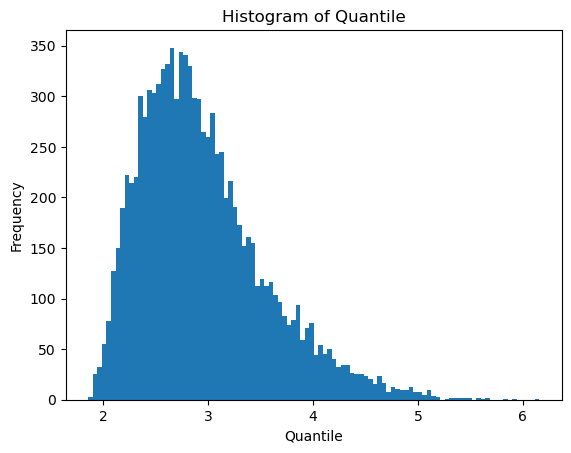

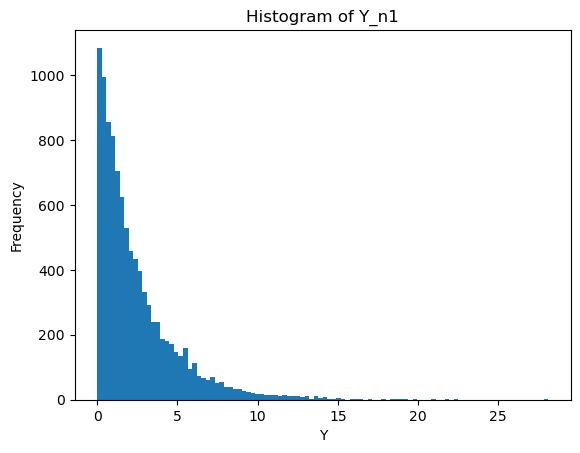

0.38587803455392006
0.2943428641027632


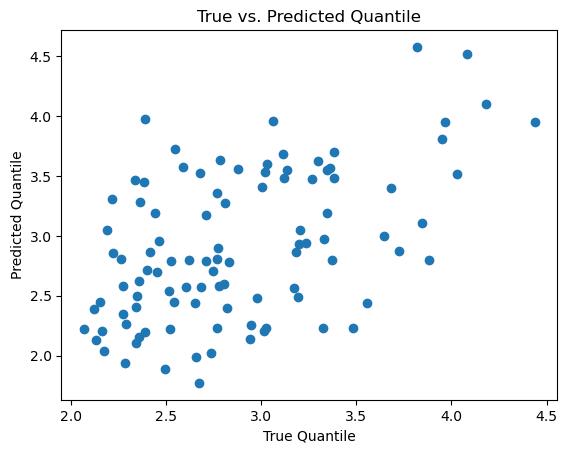

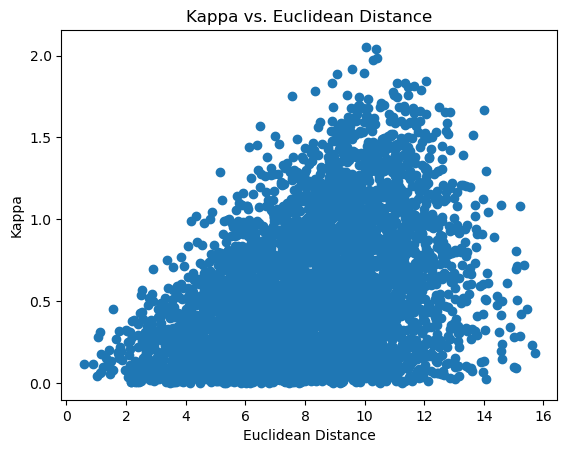

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import QuantileRegressor
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

# Define the parameters
n1 = 10000
n2 = 100
mean = 10
variance = 10
m = 4
beta = np.random.normal(0, 1, m)

# Generate the data
# generate X with uniform distribution
X = np.random.uniform(10, 20, size=(n1 + n2, m))
l = np.abs(np.dot(X, beta.T))
Y = np.random.exponential(100/l)
alpha = 0.7
quantile  = -100 * np.log(1 - alpha) / l
print(quantile.mean())
print(quantile.max())
print(quantile.var())

plt.hist(quantile, bins = 100)
plt.xlabel('Quantile')
plt.ylabel('Frequency')
plt.title('Histogram of Quantile')
plt.show()


# Split the data into n1 and n2 parts
X_n1 = X[:n1]
Y_n1 = Y[:n1]
X_n2 = X[n1:]
Y_n2 = Y[n1:]
quantile_n2 = quantile[n1:]

# Train the quantile regression model on the n1 part
model = sm.QuantReg(np.log(Y_n1), X_n1).fit(q=alpha)
predicted_quantile = model.predict(X_n2)
predicted_quantile = np.exp(predicted_quantile)


plt.hist(Y_n1, bins = 100)
plt.xlabel('Y')
plt.ylabel('Frequency')
plt.title('Histogram of Y_n1')
plt.show()

print(predicted_quantile.var())
print(quantile_n2.var())


plt.scatter(quantile_n2, predicted_quantile)
plt.xlabel('True Quantile')
plt.ylabel('Predicted Quantile')
plt.title('True vs. Predicted Quantile')
plt.show()

kappa = []
d = []
for i in range(n2):
    for j in range(i + 1, n2):
        X_1 = X_n2[i].reshape(1, -1)
        X_2 = X_n2[j].reshape(1, -1)
        kappa.append(np.abs(model.predict(X_1) - quantile_n2[i] - model.predict(X_2) + quantile_n2[j]))
        d.append(euclidean(X_n2[i], X_n2[j]))


# Plot kappa vs. d
plt.scatter(d, kappa)  # Changed to scatter plot for scalar values
plt.xlabel('Euclidean Distance')
plt.ylabel('Kappa')
plt.title('Kappa vs. Euclidean Distance')
plt.show()
